In [127]:
#Laboratorio 1 
#KNN

In [128]:
#Preparacion Datos

In [176]:
# Importar librerias
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

#KNN
from sklearn.neighbors import KNeighborsClassifier

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

In [177]:
# Ubicacion de la base de datos
db_location = "SaludAlpes_diagnosticos_dataset.csv"
# Leer los datos
df_health = pd.read_csv(db_location, delimiter=";")

**Corregir valores**

In [178]:
#Pregnancies; Eliminar "-"
df_health["Pregnancies"] = [s.replace("-", "0") for s in df_health["Pregnancies"]]
df_health['Pregnancies'] = df_health['Pregnancies'].astype(int)

In [179]:
#Glucosa: Eliminar "-" y 0
df_health["Glucose"] = [s.replace("-", "122") for s in df_health["Glucose"]]
def change_zeros_Glucose (row):
    if row['Glucose'] == '0' :
        return 122
    if row['Glucose'] == 0 :
        return 122
    return row['Glucose']
df_health['Glucose']= df_health.apply(lambda row:change_zeros_Glucose(row),axis=1)
df_health['Glucose'] = df_health['Glucose'].astype(int)


In [180]:
#Blood pressure
df_health["BloodPressure"] = [s.replace("-", "72") for s in df_health["BloodPressure"]]
def change_zeros_BloodPressure (row):
    if row['BloodPressure'] == '0' :
        return 72
    if row['BloodPressure'] == 0 :
        return 72
    return row['BloodPressure']
df_health['BloodPressure']= df_health.apply(lambda row:change_zeros_BloodPressure(row),axis=1)
df_health['BloodPressure'] = df_health['BloodPressure'].astype(int)

In [181]:
#Skin Thickness
df_health["SkinThickness"] = [s.replace("-", "21") for s in df_health["SkinThickness"]]
df_health['SkinThickness'] = df_health['SkinThickness'].astype(int)

In [182]:
#Insulina
df_health["Insulin"] = [s.replace("-", "80") for s in df_health["Insulin"]]
df_health['Insulin'] = df_health['Insulin'].astype(int)

In [183]:
#Diabetis pedigree function
df_health["DiabetesPedigreeFunction"] = [s.replace("-", "432") for s in df_health["DiabetesPedigreeFunction"]]
df_health['DiabetesPedigreeFunction'] = df_health['DiabetesPedigreeFunction'].astype(int)

In [184]:
#Cambiar las edades que no tienen sentido
df_health['Age'].replace({450:33,3256:33},inplace = True)

In [185]:
#En BMI no hay que modificar entradas porque no hay erroes

In [186]:
#Mirar resultados del outcome
df_health['Outcome'].value_counts()

0    499
1    268
-      1
Name: Outcome, dtype: int64

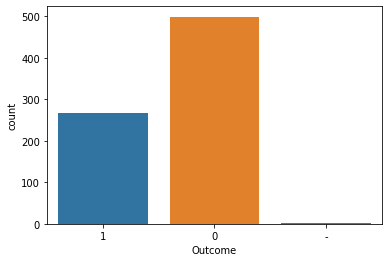

In [187]:
ax = sns.countplot(x='Outcome', data=df_health)

In [188]:
#Eliminar fila de '-'
df_health= df_health[df_health['Outcome']!='-']
df_health['Outcome'] = df_health['Outcome'].astype(int)

In [189]:
#Elminar columnas inaportantes
df_health_Modeling=df_health
df_health_Modeling=df_health_Modeling.drop(['City','Hair color'], axis=1)
df_health_Modeling.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,336,627,50,1
1,1,85,66,29,0,266,351,31,0
2,8,183,64,0,0,233,672,32,1
3,1,89,66,23,94,281,167,21,0
4,0,137,40,35,168,431,2288,33,1


## **Construccion Modelo KNN**

In [190]:
#Variable Objetivo: Outcome
Y = df_health_Modeling['Outcome']

In [191]:
# Eliminar variable Outcome del conjunto de datos
X = df_health_Modeling.drop(['Outcome'], axis=1)

In [192]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**KNN**

In [193]:
neigh = KNeighborsClassifier(n_neighbors=4) #
neigh = neigh.fit(X_train, Y_train) #Encaja el clasificador de los K vecinos mas cercanos

In [194]:
#Prediccion 
y_pred = neigh.predict(X_test)

In [195]:
#Matriz confusion
confusion_matrix(Y_test, y_pred)

array([[94, 14],
       [35, 11]])

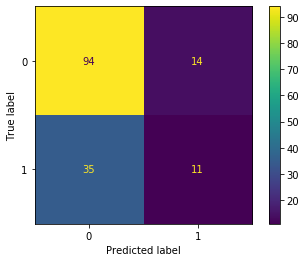

In [196]:
#Matriz confusion
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

- Verdaderos Positivos: 82
- Falsos negativos: 26
- Falsos positivos: 25
- Verdaderos negativos: 21

In [197]:
#Reporte Clasificacion
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       108
           1       0.44      0.24      0.31        46

    accuracy                           0.68       154
   macro avg       0.58      0.55      0.55       154
weighted avg       0.64      0.68      0.65       154



In [198]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.68
Recall: 0.2391304347826087
Precisión: 0.44
Puntuación F1: 0.3098591549295775


- Exactitud: Porcentaje de predicciones correctas
- Recall: Porcentaje de aciertos de positivos. Que proporcion de los positivos reales fue identificada correctamente
- Precision: Porcentaje de positivos (falsos y verdaderos) que fue identificado correctamente
- F1: Balance entre precision y recall

In [199]:
#Prueba de KNN con datos Normalizados
df_health_pru = df_health_Modeling.copy()
df_health_pru
normalized_df=(df_health_pru-df_health_pru.min())/(df_health_pru.max()-df_health_pru.min())

print(normalized_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.353535  0.000000  0.500745   
1       0.058824  0.264516       0.428571       0.292929  0.000000  0.396423   
2       0.470588  0.896774       0.408163       0.000000  0.000000  0.347243   
3       0.058824  0.290323       0.428571       0.232323  0.111111  0.418778   
4       0.000000  0.600000       0.163265       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.484848  0.212766  0.490313   
764     0.117647  0.503226       0.469388       0.272727  0.000000  0.548435   
765     0.294118  0.496774       0.489796       0.232323  0.132388  0.390462   
766     0.058824  0.529032       0.367347       0.000000  0.000000  0.448584   
767     0.058824  0.316129       0.469388       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [200]:
normalized_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,0.225861,0.501401,0.493694,0.207709,0.094449,0.431699,0.185307,0.204346,0.349413
std,0.198143,0.196424,0.123508,0.161064,0.136268,0.174040,0.144392,0.195783,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.358065,0.408163,0.000000,0.000000,0.374814,0.087844,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.232323,0.037825,0.460507,0.144330,0.133333,0.000000
75%,0.352941,0.622581,0.571429,0.323232,0.150709,0.535022,0.253866,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
Yn = normalized_df['Outcome']

Xn = normalized_df.drop(['Outcome'], axis=1)

In [202]:
#KNN con Datos Normalizados
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(Xn, Yn, test_size=0.2, random_state=0)
neigh_norm = KNeighborsClassifier(n_neighbors=10) #10 Vecinos
neigh_norm = neigh_norm.fit(X_train_n, Y_train_n) 
y_pred_n = neigh_norm.predict(X_test_n) 
print('Exactitud: %.2f' % accuracy_score(Y_test_n, y_pred_n))
print("Recall: {}".format(recall_score(Y_test_n,y_pred_n)))
print("Precisión: {}".format(precision_score(Y_test_n,y_pred_n)))
print("Puntuación F1: {}".format(f1_score(Y_test_n,y_pred_n)))


Exactitud: 0.81
Recall: 0.5434782608695652
Precisión: 0.7575757575757576
Puntuación F1: 0.6329113924050633


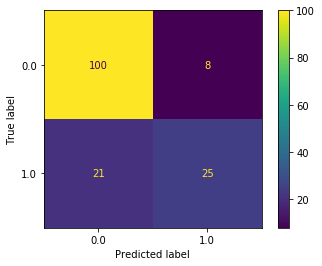

In [203]:
plot_confusion_matrix(neigh_norm, X_test_n, Y_test_n)  
plt.show()

Aca podemos ver que cuando normalizamos los datos y utilizamos 10 vecinos, el modelo arroja muchos mejores resultados. El numero de verdaderos positivos es 100, mucho mayor a los modelos anteriores. Ademas de eso, la precision y la exactitud tienen valores de 0.81 y 0.75 respectivamente

In [204]:
#Estadisticas con los datos de entrenamiento
y_pred = neigh.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 0.79
Recall: 0.46846846846846846
Precisión: 0.8888888888888888
Puntuación F1: 0.6135693215339232


## **Escoger Mejores Hiperparametros**

In [205]:
# Parametros a modificar: 
#Numero de vecinos: de 0 a 11
n_neighbors = list(range(1,12))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))

#Funcioon de distancia: Manhatan o Euclidena
p=[1,2] 

In [206]:
#Diccionario de hiperparametros
hiperparametros = dict(n_neighbors=n_neighbors,p=p)
hiperparametros

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'p': [1, 2]}

In [207]:
#KNN modificado
knn_hiper = KNeighborsClassifier()

Se aplica GridSearch, lo cual implementa un "fit", "score" y "predict" utilizando los distintos parametros que estann en el diccionatio. Realiza un modelo con parametros "cross" validados para encontrar el modelo que arroje los mejores resultados

In [208]:
#Grid
knn_grid = GridSearchCV(knn_hiper, hiperparametros, cv=10)

In [209]:
knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'p': [1, 2]})

In [210]:
#Valor de los hiperparametros con los mejores resultados
print('Best p:', knn_grid.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_grid.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 7


In [211]:
knn_grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

Con eso podemos concluir que la mejor medida de distancia es la Minkowski y que el numero optimo de vecinos es 7

### *Mejor Modelo*

In [212]:
# Mejor modelo.
mejor_neigh = knn_grid.best_estimator_

In [213]:
#Probar el modelo con los datos de prueba
y_pred_train = mejor_neigh.predict(X_train)
y_pred_test = mejor_neigh.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.78
Exactitud sobre test: 0.69


In [214]:
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 0.79
Recall: 0.46846846846846846
Precisión: 0.8888888888888888
Puntuación F1: 0.6135693215339232


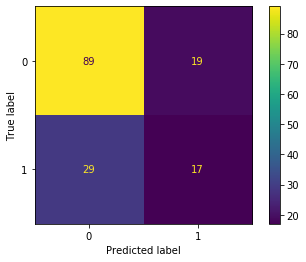

In [215]:
plot_confusion_matrix(mejor_neigh, X_test, Y_test)  
plt.show()

Aca podemos tuvimos un modelo con una exactitud de 0.79 y una precision de 0.88 . Ademas de eso, un recall bajo y una puntuacion F1 de 71.

## Busqueda de Hiperparametros con datos normalizados

In [222]:
#Creacion Modelo
knn_hiper_norm = KNeighborsClassifier()
knn_grid_norm = GridSearchCV(knn_hiper_norm, hiperparametros, cv=10)
knn_grid_norm.fit(X_train_n, Y_train_n)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'p': [1, 2]})

In [223]:
#Valor de los hiperparametros con los mejores resultados
print('Best p:', knn_grid_norm.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_grid_norm.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 4


In [224]:
mejor_neigh_norm = knn_grid_norm.best_estimator_

In [225]:
#Probar el modelo con los datos de prueba normalizados
y_pred_train_n = mejor_neigh_norm.predict(X_train_n)
y_pred_test_n = mejor_neigh_norm.predict(X_test_n)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train_n, y_pred_train_n))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test_n, y_pred_test_n))

Exactitud sobre entrenamiento: 0.80
Exactitud sobre test: 0.77


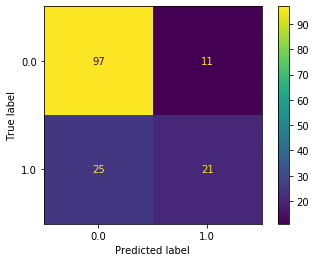

In [226]:
plot_confusion_matrix(mejor_neigh_norm, X_test_n, Y_test_n)  
plt.show()

Conclusión: El mejor modelo ocurre cuando normalizamos los datos y utilizamos 4 k-vecinos y la medida de distancia minkowski